✅ Prototipo: (200, 15)
✅ Inclusión v2: (300, 31)
📊 Distribución sectorial (%):


,Prototipo,Inclusión v2
sector,,
banca,40.0,44.33
logística,6.5,30.33
genérico / otros,0.0,9.33
cripto / fintech,0.0,4.00
retail / e-commerce / streaming,0.0,3.33
energía / seguros,0.0,3.33
saas / cloud / plataformas,0.0,3.33
público / administración,0.0,1.67
administración pública,0.0,0.33


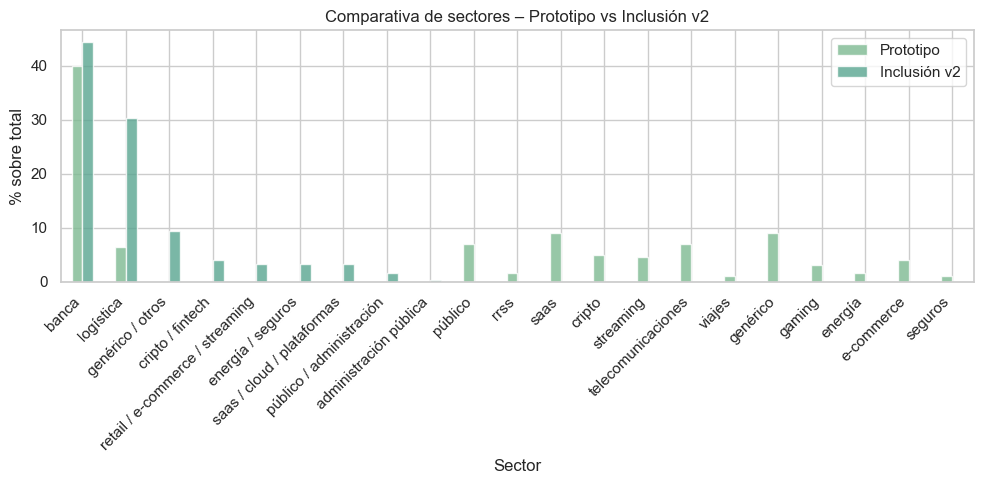

🏦 Entidades más frecuentes:


,Prototipo,Inclusión v2
entidad,,
genérico,34,0
ing,17,11
bbva,10,16
dgt,9,0
santander,7,40
netflix,7,0
ionos,6,0
orange,5,0
caixabank,5,24


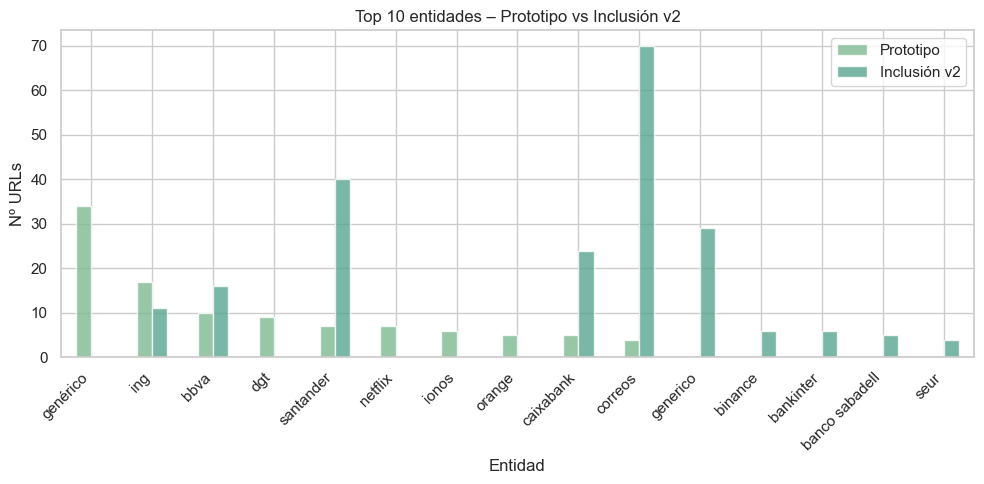

In [29]:
# ==============================================================
# 📊 Análisis comparativo – Sectores y entidades
# ==============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --------------------------------------------------------------
# 1️⃣ Cargar los datasets
# --------------------------------------------------------------
proto = pd.read_csv("../features/features_prototipo_con_sector_entidad.csv")
v2 = pd.read_csv("../outputs/inclusion_v2/predicciones_inclusion_v2.csv")

print(f"✅ Prototipo: {proto.shape}")
print(f"✅ Inclusión v2: {v2.shape}")

# --------------------------------------------------------------
# 2️⃣ Normalizar nombres de columnas y texto
# --------------------------------------------------------------
rename_map = {
    "categoria": "sector",
    "matched_target": "entidad"
}
proto = proto.rename(columns=rename_map)

for df in [proto, v2]:
    for col in ["sector", "entidad"]:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower()

# --------------------------------------------------------------
# 3️⃣ Distribución de sectores
# --------------------------------------------------------------
sectores_proto = proto["sector"].value_counts(normalize=True).sort_index() * 100
sectores_v2 = v2["sector"].value_counts(normalize=True).sort_index() * 100

sectores_df = pd.concat([sectores_proto, sectores_v2], axis=1, keys=["Prototipo", "Inclusión v2"]).fillna(0)
sectores_df = sectores_df.sort_values("Inclusión v2", ascending=False)

print("📊 Distribución sectorial (%):")
display(sectores_df.round(2))

# --------------------------------------------------------------
# 4️⃣ Gráfico comparativo de sectores
# --------------------------------------------------------------
sectores_df.plot(kind="bar", figsize=(10, 5), alpha=0.8)
plt.title("Comparativa de sectores – Prototipo vs Inclusión v2")
plt.ylabel("% sobre total")
plt.xlabel("Sector")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("imagenes/eda_sectores_proto_v2.png", dpi=300, bbox_inches="tight")
plt.show()

# --------------------------------------------------------------
# 5️⃣ Análisis de entidades más frecuentes
# --------------------------------------------------------------
top_ent_proto = proto["entidad"].value_counts().head(10)
top_ent_v2 = v2["entidad"].value_counts().head(10)

entidades_df = pd.concat(
    [top_ent_proto, top_ent_v2],
    axis=1, keys=["Prototipo", "Inclusión v2"]
).fillna(0).astype(int)

print("🏦 Entidades más frecuentes:")
display(entidades_df)

# --------------------------------------------------------------
# 6️⃣ Gráfico comparativo de entidades principales
# --------------------------------------------------------------
entidades_df.plot(kind="bar", figsize=(10, 5), alpha=0.8)
plt.title("Top 10 entidades – Prototipo vs Inclusión v2")
plt.ylabel("Nº URLs")
plt.xlabel("Entidad")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("imagenes/eda_entidades_proto_v2.png", dpi=300, bbox_inches="tight")
plt.show()



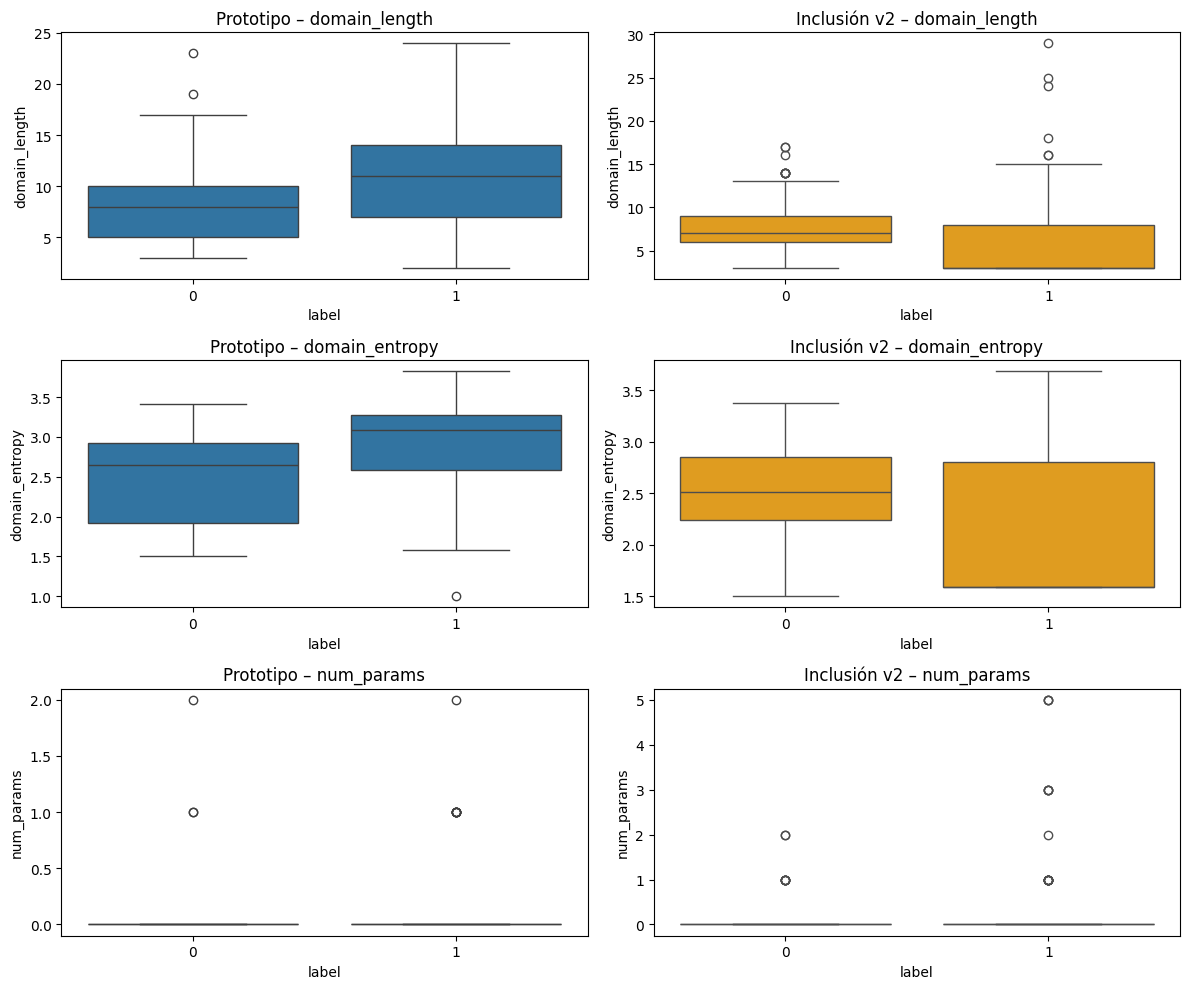

,feature,proto_phish,v2_phish,proto_legit,v2_legit
0,domain_length,11.270,6.327,8.140,7.693
1,domain_entropy,2.891,2.179,2.475,2.441
2,num_params,0.090,0.260,0.040,0.073


,feature,proto_mean_%,v2_mean_%
0,trusted_path_token,19.0,19.33
1,suspicious_path_token,15.0,48.67
2,free_hosting,11.0,0.00
3,contains_equal,5.5,6.00
4,contains_percent,3.0,3.67
5,protocol,92.5,88.67


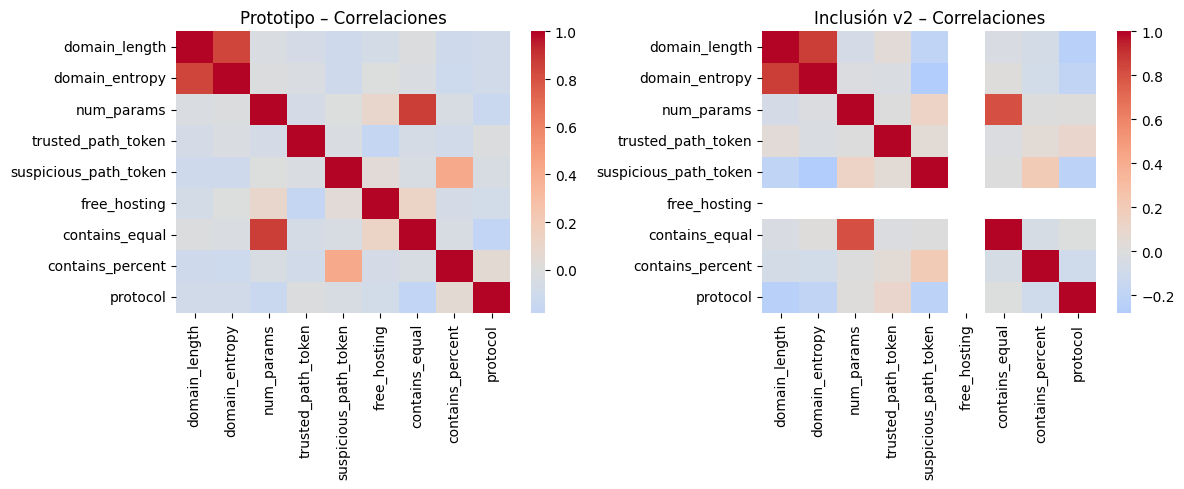

In [17]:
numeric_features = ["domain_length", "domain_entropy", "num_params"]

fig, axes = plt.subplots(len(numeric_features), 2, figsize=(12, 10))
for i, feat in enumerate(numeric_features):
    sns.boxplot(x="label", y=feat, data=proto, ax=axes[i,0])
    axes[i,0].set_title(f"Prototipo – {feat}")
    sns.boxplot(x="label", y=feat, data=v2, ax=axes[i,1], color="orange")
    axes[i,1].set_title(f"Inclusión v2 – {feat}")
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# 3️⃣ Comparativa de medias
# --------------------------------------------------------------
comparativa = []
for feat in numeric_features:
    stats = {
        "feature": feat,
        "proto_phish": proto.loc[proto["label"]==1, feat].mean(),
        "v2_phish": v2.loc[v2["label"]==1, feat].mean(),
        "proto_legit": proto.loc[proto["label"]==0, feat].mean(),
        "v2_legit": v2.loc[v2["label"]==0, feat].mean()
    }
    comparativa.append(stats)

df_comp = pd.DataFrame(comparativa)
display(df_comp.round(3))

# --------------------------------------------------------------
# 4️⃣ Features binarias (proporción de presencia)
# --------------------------------------------------------------
binary_features = [
    "trusted_path_token","suspicious_path_token","free_hosting",
    "contains_equal","contains_percent","protocol"
]

binary_summary = []
for feat in binary_features:
    if feat in proto.columns and feat in v2.columns:
        binary_summary.append({
            "feature": feat,
            "proto_mean_%": proto[feat].mean()*100,
            "v2_mean_%": v2[feat].mean()*100
        })

df_bin = pd.DataFrame(binary_summary)
display(df_bin.round(2))

# --------------------------------------------------------------
# 5️⃣ Correlaciones entre features
# --------------------------------------------------------------
corr_feats = [f for f in numeric_features + binary_features if f in proto.columns]
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(proto[corr_feats].corr(), ax=ax[0], cmap="coolwarm", center=0)
ax[0].set_title("Prototipo – Correlaciones")
sns.heatmap(v2[corr_feats].corr(), ax=ax[1], cmap="coolwarm", center=0)
ax[1].set_title("Inclusión v2 – Correlaciones")
plt.tight_layout()
plt.show()

In [21]:
# Estilo global para todos los gráficos del proyecto
sns.set_theme(context="notebook", style="whitegrid", palette="crest", font_scale=1.1)
plt.rcParams["axes.titlesize"] = 13
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["figure.dpi"] = 100


/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_57038/3466589451.py:23: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_57038/3466589451.py:23: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_57038/3466589451.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_57038/3466589451.py:24: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Arial.
  plt.savefig("imagenes/eda_boxplots_proto_v2.png", dpi=300, bbox_inches="tight")
/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_57038/3466589451.py:24: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.savefig("imagenes/eda_boxplots_proto_v2.png", dpi=300, bbox_inches="ti

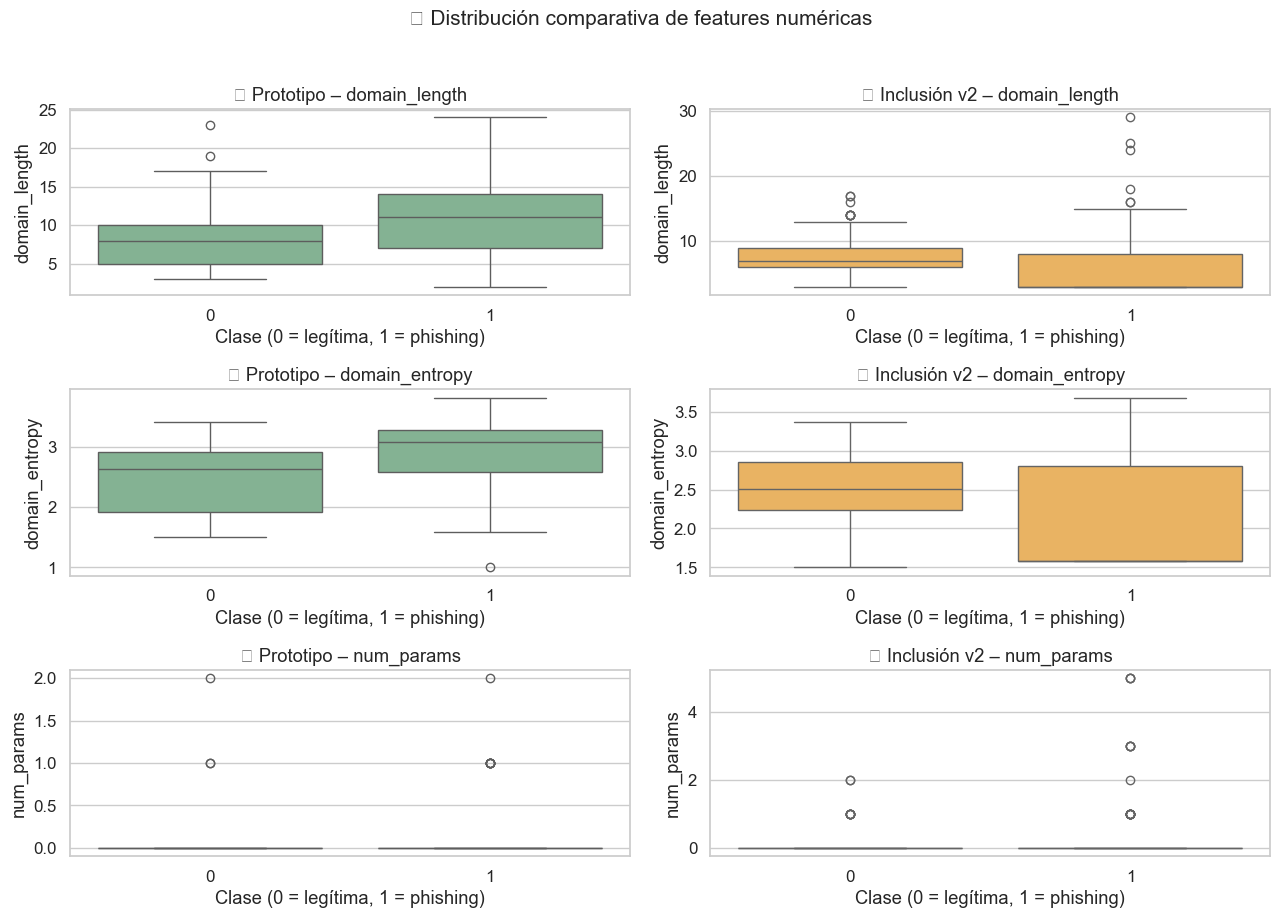

In [22]:
# ==============================================================
# 🎨 Boxplots comparativos – Prototipo vs Inclusión v2
# ==============================================================

import seaborn as sns
import matplotlib.pyplot as plt

# Configuración visual
sns.set_theme(style="whitegrid", palette="crest", font_scale=1.1)

features = ["domain_length", "domain_entropy", "num_params"]
fig, axes = plt.subplots(len(features), 2, figsize=(13, 9))

for i, feat in enumerate(features):
    sns.boxplot(x="label", y=feat, data=proto, ax=axes[i,0])
    axes[i,0].set_title(f"🧩 Prototipo – {feat}")
    axes[i,0].set_xlabel("Clase (0 = legítima, 1 = phishing)")
    sns.boxplot(x="label", y=feat, data=v2, ax=axes[i,1], color="#FFB84D")
    axes[i,1].set_title(f"🚀 Inclusión v2 – {feat}")
    axes[i,1].set_xlabel("Clase (0 = legítima, 1 = phishing)")

plt.suptitle("📊 Distribución comparativa de features numéricas", fontsize=15, y=1.02)
plt.tight_layout()
plt.savefig("imagenes/eda_boxplots_proto_v2.png", dpi=300, bbox_inches="tight")
plt.show()


/opt/anaconda3/envs/phishing-env/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Arial.
  fig.canvas.draw()
/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_57038/3556525117.py:28: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_57038/3556525117.py:28: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_57038/3556525117.py:29: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) Arial.
  plt.savefig("imagenes/eda_correlaciones_proto_v2.png", dpi=300, bbox_inches="tight")
/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_57038/3556525117.py:29: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.savefig("imagenes/eda_correlaciones_proto_v2.png", dpi=300, bbox_

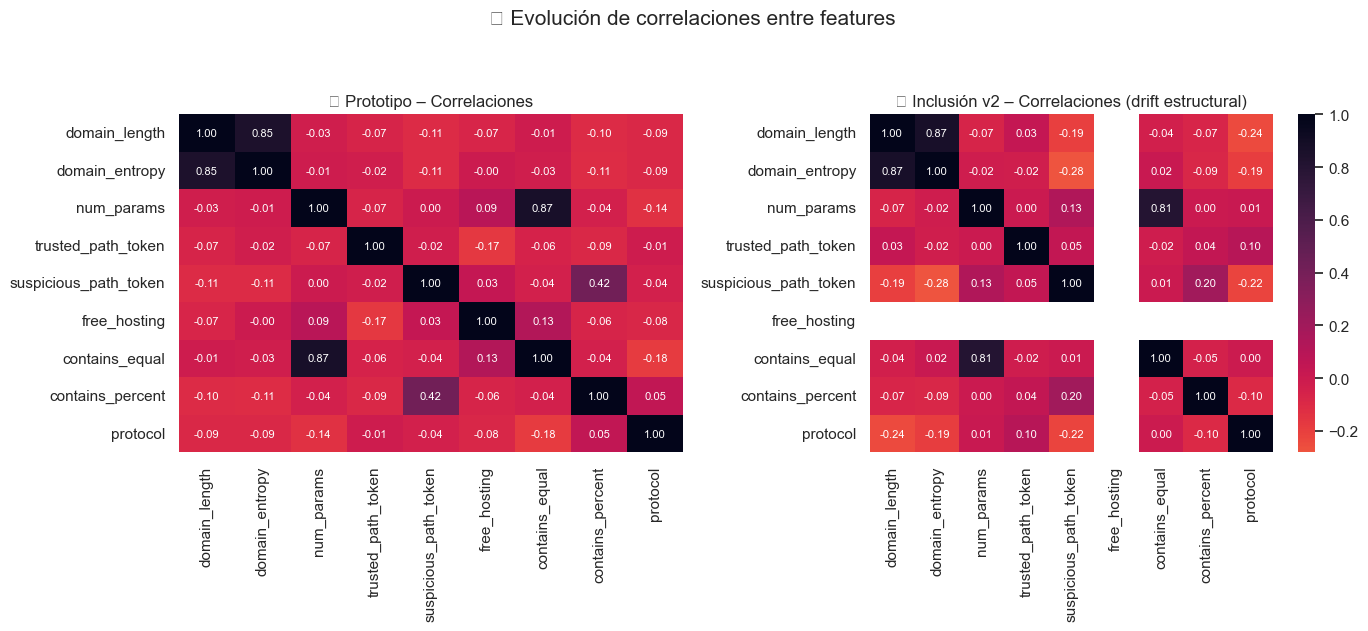

In [23]:
# ==============================================================
# 🎨 Correlaciones comparativas – Prototipo vs Inclusión v2
# ==============================================================

import numpy as np

corr_feats = [
    "domain_length", "domain_entropy", "num_params",
    "trusted_path_token", "suspicious_path_token",
    "free_hosting", "contains_equal", "contains_percent", "protocol"
]
corr_feats = [f for f in corr_feats if f in proto.columns and f in v2.columns]

sns.set_theme(style="white", font_scale=1.0)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(proto[corr_feats].corr(), cmap="rocket_r", center=0,
            annot=True, fmt=".2f", ax=axes[0], cbar=False,
            annot_kws={"size": 8})
axes[0].set_title("🧩 Prototipo – Correlaciones")

sns.heatmap(v2[corr_feats].corr(), cmap="rocket_r", center=0,
            annot=True, fmt=".2f", ax=axes[1],
            annot_kws={"size": 8})
axes[1].set_title("🚀 Inclusión v2 – Correlaciones (drift estructural)")

plt.suptitle("🔬 Evolución de correlaciones entre features", fontsize=15, y=1.05)
plt.tight_layout()
plt.savefig("imagenes/eda_correlaciones_proto_v2.png", dpi=300, bbox_inches="tight")
plt.show()


,feature,proto_phish,v2_phish,Δ_phish_%,proto_legit,v2_legit,Δ_legit_%
0,domain_length,11.270,6.327,-43.9,8.140,7.693,-5.5
1,domain_entropy,2.891,2.179,-24.6,2.475,2.441,-1.4
2,num_params,0.090,0.260,188.9,0.040,0.073,83.3


,feature,proto_%,v2_%,Δ_%
0,trusted_path_token,19.0,19.3,0.3
1,suspicious_path_token,15.0,48.7,33.7
2,free_hosting,11.0,0.0,-11.0
3,contains_equal,5.5,6.0,0.5
4,contains_percent,3.0,3.7,0.7
5,protocol,92.5,88.7,-3.8


/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_57038/2336561596.py:74: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fc/53j7mrrs40j5jvl09zqzrcqw0000gn/T/ipykernel_57038/2336561596.py:75: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.savefig("imagenes/eda_resumen_variaciones_proto_v2.png", dpi=300, bbox_inches="tight")
/opt/anaconda3/envs/phishing-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


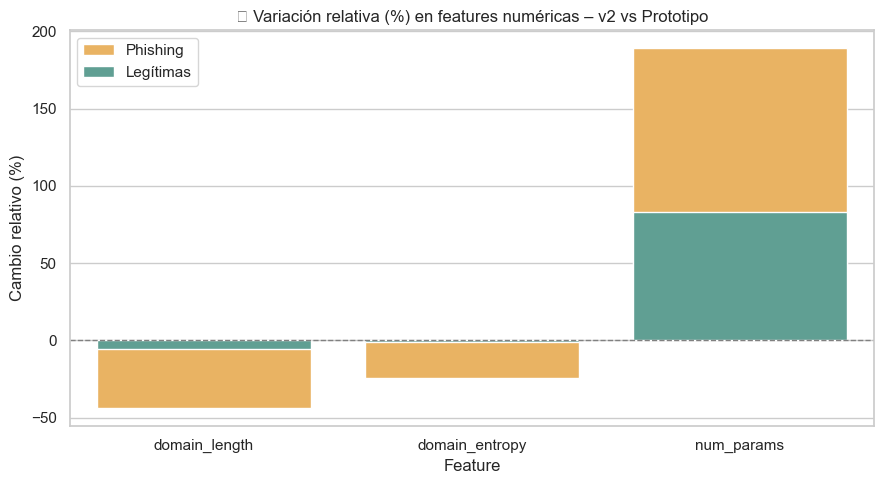

In [25]:
# ==============================================================
# 📈 Resumen final – Variaciones entre Prototipo y Inclusión v2
# ==============================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------------------------------------------
# 1️⃣ Tabla de diferencias numéricas (por clase)
# --------------------------------------------------------------
summary = []

numeric_features = ["domain_length", "domain_entropy", "num_params"]
for feat in numeric_features:
    proto_phish = proto.loc[proto["label"]==1, feat].mean()
    v2_phish = v2.loc[v2["label"]==1, feat].mean()
    proto_legit = proto.loc[proto["label"]==0, feat].mean()
    v2_legit = v2.loc[v2["label"]==0, feat].mean()

    diff_phish = ((v2_phish - proto_phish) / proto_phish) * 100
    diff_legit = ((v2_legit - proto_legit) / proto_legit) * 100

    summary.append({
        "feature": feat,
        "proto_phish": round(proto_phish, 3),
        "v2_phish": round(v2_phish, 3),
        "Δ_phish_%": round(diff_phish, 1),
        "proto_legit": round(proto_legit, 3),
        "v2_legit": round(v2_legit, 3),
        "Δ_legit_%": round(diff_legit, 1)
    })

df_summary = pd.DataFrame(summary)
display(df_summary)

# --------------------------------------------------------------
# 2️⃣ Variaciones en features binarias
# --------------------------------------------------------------
binary_features = [
    "trusted_path_token","suspicious_path_token",
    "free_hosting","contains_equal","contains_percent","protocol"
]

bin_summary = []
for feat in binary_features:
    if feat in proto.columns and feat in v2.columns:
        proto_mean = proto[feat].mean()*100
        v2_mean = v2[feat].mean()*100
        delta = v2_mean - proto_mean
        bin_summary.append({
            "feature": feat,
            "proto_%": round(proto_mean,1),
            "v2_%": round(v2_mean,1),
            "Δ_%": round(delta,1)
        })

df_bin_summary = pd.DataFrame(bin_summary)
display(df_bin_summary)

# --------------------------------------------------------------
# 3️⃣ Gráfico resumen – cambios relativos
# --------------------------------------------------------------
sns.set_theme(style="whitegrid", palette="crest")

plt.figure(figsize=(9,5))
sns.barplot(x="feature", y="Δ_phish_%", data=df_summary, color="#FFB84D", label="Phishing")
sns.barplot(x="feature", y="Δ_legit_%", data=df_summary, color="#5A9", label="Legítimas")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.title("🔍 Variación relativa (%) en features numéricas – v2 vs Prototipo")
plt.ylabel("Cambio relativo (%)")
plt.xlabel("Feature")
plt.legend()
plt.tight_layout()
plt.savefig("imagenes/eda_resumen_variaciones_proto_v2.png", dpi=300, bbox_inches="tight")
plt.show()
